<a href="https://colab.research.google.com/github/siddhp4/Assignment-1-Q23-Basic-Statistics-Level-1-/blob/main/Assig_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 16. Neural Network - 01

#### Dataset: forestfires.csv


In [1]:
# Importig Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Loading dataset

data = pd.read_csv('forestfires.csv')

### EDA & Data preprocessing

In [4]:
data.shape

(517, 31)

In [5]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [6]:
data.sample(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
328,sep,sat,92.2,102.3,751.5,8.4,19.7,35,1.8,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small
300,jun,mon,90.4,93.3,298.1,7.5,20.7,25,4.9,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
440,sep,fri,90.3,290.0,855.3,7.4,16.2,58,3.6,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small
47,jul,mon,94.2,62.3,442.9,11.0,23.0,36,3.1,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,small
10,sep,sat,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small
199,sep,mon,63.5,70.8,665.3,0.8,22.6,38,3.6,0.0,11.32,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,large
338,sep,mon,91.6,108.4,764.0,6.2,22.7,35,2.2,0.0,7.48,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,large
353,sep,fri,92.1,99.0,745.3,9.6,19.8,47,2.7,0.0,1.72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small
82,aug,tue,94.8,108.3,647.1,17.0,18.6,51,4.5,0.0,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small
79,aug,tue,91.0,121.2,561.6,7.0,21.6,19,6.7,0.0,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
# Dropping columns which are not required

data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [11]:
# Checking how much datapoints are having small and large area
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

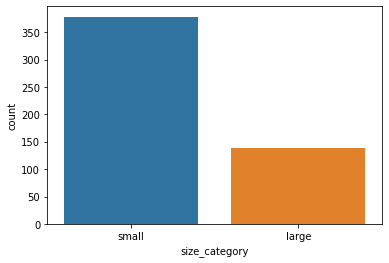

In [12]:
import seaborn as sns
sns.countplot(x = 'size_category', data = data)

In [13]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

size_category,large,small
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


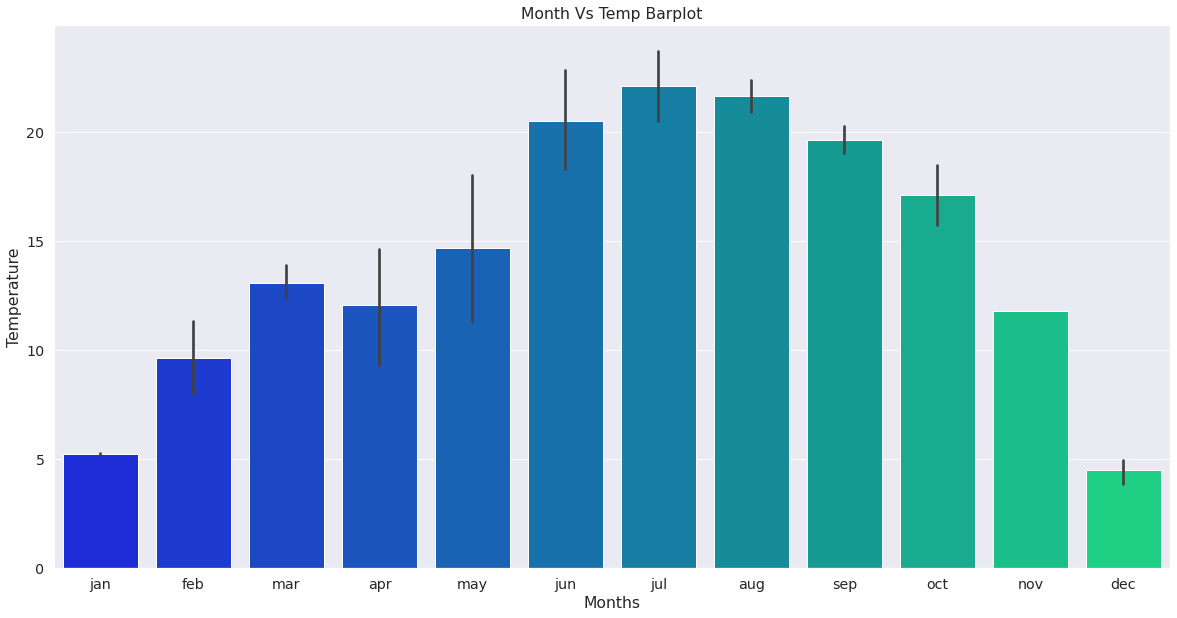

In [14]:
# Plotting Month Vs. temp plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


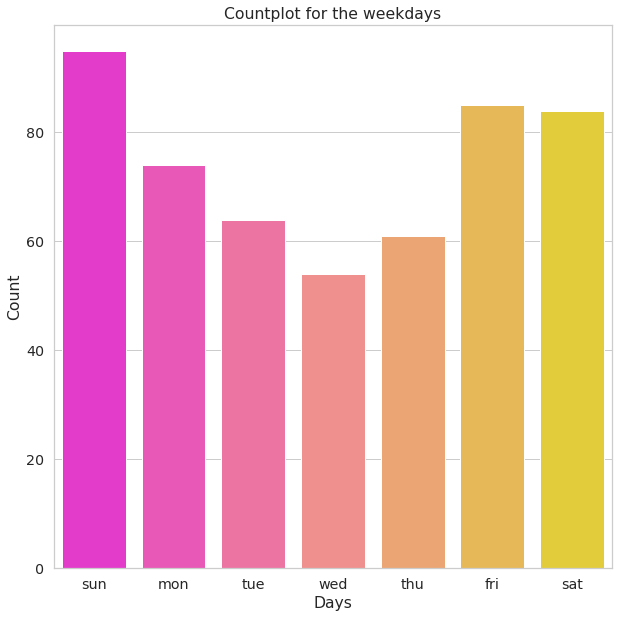

In [15]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(data['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the weekdays', xlabel = 'Days', ylabel = 'Count');

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

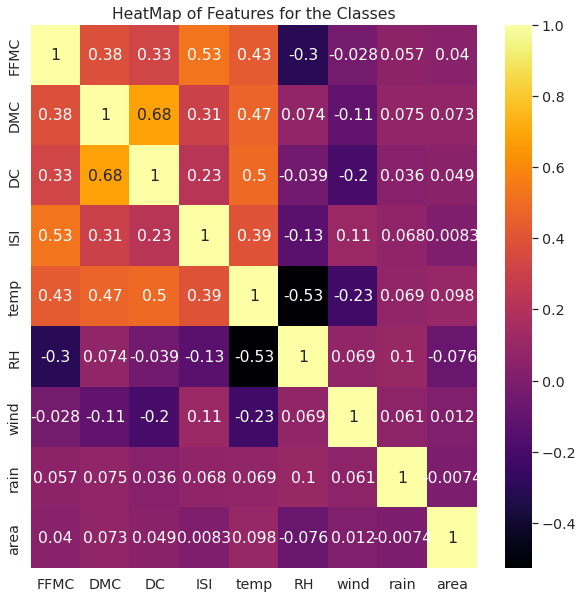

In [16]:
sns.heatmap(data.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [17]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [18]:
# Encoding month and day features

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [19]:
# Encoding target variable 'size category'

data.size_category.replace(('small', 'large'), (0, 1), inplace = True)
data.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
101,8,2,88.8,147.3,614.5,9.0,14.4,66,5.4,0.0,0.00,0
247,8,3,92.2,91.6,503.6,9.6,20.7,70,2.2,0.0,0.75,0
428,8,4,94.8,222.4,698.6,13.9,26.2,34,5.8,0.0,0.00,0
210,10,6,90.6,43.7,686.9,6.7,18.4,25,3.1,0.0,24.23,1
93,8,7,91.4,142.4,601.4,10.6,18.2,43,4.9,0.0,0.00,0


In [20]:
data.corr()['size_category'].sort_values(ascending=False)

size_category    1.000000
area             0.311322
month            0.080316
wind             0.059113
rain             0.050001
DMC              0.034715
FFMC             0.022063
DC               0.019428
day              0.016796
temp             0.006021
ISI             -0.008726
RH              -0.045243
Name: size_category, dtype: float64

In [21]:
# Standardizing data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
scaler.fit(data.drop('size_category',axis=1))

StandardScaler()

In [23]:
scaled_features=scaler.transform(data.drop('size_category',axis=1))
data_head=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_head

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [24]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_head,data['size_category'], test_size=0.3, random_state=42)

In [25]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (361, 11)
Shape of x_test:  (156, 11)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


### Artificial Neural Network Model - Backpropagation

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [28]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Fit the model
model.fit(x_train,y_train, epochs=100, batch_size=10)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.7091
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.7285
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.7285
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.7285
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7313
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7396
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7535
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7645
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7784
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8006
Epoch 11/

In [30]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9679
accuracy: 96.79%


### Artificial Neural Network Model - Tuning of Hyperparameters batch size and epochs 

In [31]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [32]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=adam_v2.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [33]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.959 total time=   1.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.944 total time=   1.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.986 total time=   1.3s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.986 total time=   1.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.944 total time=   1.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [34]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9722222208976745, using {'batch_size': 20, 'epochs': 100}
0.9640030264854431,0.0188075077546884 with: {'batch_size': 10, 'epochs': 10}
0.966742753982544,0.014194584661031812 with: {'batch_size': 10, 'epochs': 50}
0.9666666626930237,0.02576004694866349 with: {'batch_size': 10, 'epochs': 100}
0.9003424525260926,0.03847413159439316 with: {'batch_size': 20, 'epochs': 10}
0.9667047023773193,0.022599675262683125 with: {'batch_size': 20, 'epochs': 50}
0.9722222208976745,0.026352307551859317 with: {'batch_size': 20, 'epochs': 100}
0.7424276947975159,0.045002097220154025 with: {'batch_size': 40, 'epochs': 10}
0.9639649868011475,0.02424274610889378 with: {'batch_size': 40, 'epochs': 50}
0.947374427318573,0.037669612694489533 with: {'batch_size': 40, 'epochs': 100}


## Artificial Neural Network Model - Tuning of All Hyperparameters 

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train, y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  from ipykernel import kernelapp as app


Streaming output truncated to the last 5000 lines.
[CV 5/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.764 total time=   2.5s
[CV 1/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.726 total time=   2.5s
[CV 2/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.736 total time=   2.5s
[CV 3/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0,

#### Best : 0.9916666626930237, using {'activation_function': 'tanh', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 2}

### Building final model with above best parameters obtained from tuning hyper paramters

In [ ]:
# create model
final_model = Sequential()
final_model.add(Dense(4,input_dim = 11,kernel_initializer = 'normal',activation = 'tanh'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2,input_dim = 4,kernel_initializer = 'normal',activation = 'tanh'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation = 'sigmoid'))
    
adam=adam_v2.Adam(learning_rate = 0.01)


In [ ]:
# Compile Model
final_model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])

In [ ]:
# Fit the model
final_model.fit(x_train,y_train, epochs=50, batch_size=20)

Epoch 1/50
19/19 [==============================] - 1s 2ms/step - loss: 0.6608 - accuracy: 0.7313
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.7479
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7701
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.8033
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.8310
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8476
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8837
Epoch 8/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9030
Epoch 9/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9335
Epoch 10/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9418
Epoch 11/50
19/19 [

In [ ]:
# evaluate the model
scores = final_model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (final_model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9808
accuracy: 98.08%
